In [1]:
import torch 
from fig_settings import *

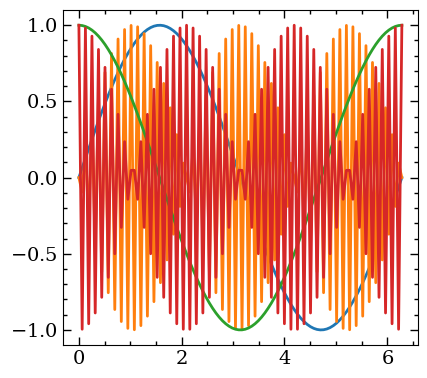

In [36]:
N = 100 
k = torch.arange(1, N+1).reshape(-1, 1)
T, step = 2*torch.pi, 100
E0, nu0 = 1.0, 1.0
time = torch.linspace(0, T, step)
e0 = torch.sin(time * k)
e0_dot = torch.cos(time * k)
plt.plot(time, e0[::50].T.numpy(), label=r'$e_0$')
plt.plot(time, e0_dot[::50].T.numpy(), label=r'$\dot{e}_0$')
plt.tight_layout()


In [22]:
def solve_ode(e0, e0_dot, dt):
    xi = torch.zeros_like(e0)
    s = torch.zeros_like(e0)
    for i in range(len(e0)-1):
        xi[i+1] = xi[i] + (e0_dot[i] - xi[i]) * dt
        s[i] = E0 * e0[i] + nu0 * e0_dot[i] + (xi[i] - e0_dot[i])
    s[-1] = E0 * e0[-1] + nu0 * e0_dot[-1] + (xi[-1] - e0_dot[-1])
    return s, xi

In [23]:
s, xi = solve_ode(e0, e0_dot, T/N)

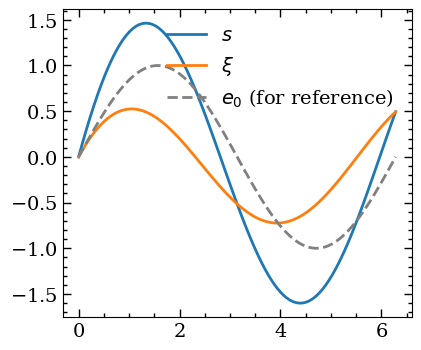

In [27]:
plt.plot(time, s.numpy(), label=r'$s$')
plt.plot(time, xi.numpy(), label=r'$\xi$')
plt.plot(time, e0.numpy(), label=r'$e_0$ (for reference)', linestyle='dashed', color='gray')
plt.legend()

In [28]:
step = args.step

e = torch.tensor(data["strain"][:N, ::step], dtype=torch.float32).to(device)
e_dot = torch.tensor(data["strain_rate"][:N, ::step], dtype=torch.float32).to(device)
s = torch.tensor(data["stress"][:N, ::step], dtype=torch.float32).to(device)
E = torch.tensor(data["E"][:N], dtype=torch.float32).to(device)
nu = torch.tensor(data["nu"][:N], dtype=torch.float32).to(device)

loss_function = LossFunction()

ae_E = AutoEncoder(E.shape[1], args.encoder_hidden_dim, args.encoder_latent_dim).to(
    device
)
ae_nu = AutoEncoder(nu.shape[1], args.encoder_hidden_dim, args.encoder_latent_dim).to(
    device
)

ae_E.load_state_dict(torch.load(f"{args.encoder_path}/ae_E.pth", weights_only=True, map_location=torch.device('cpu')))
ae_nu.load_state_dict(torch.load(f"{args.encoder_path}/ae_nu.pth", weights_only=True, map_location=torch.device('cpu')))

(torch.Size([100]), torch.Size([100]))